## Libraries

In [9]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D 

## Suppressing system with proportional controller

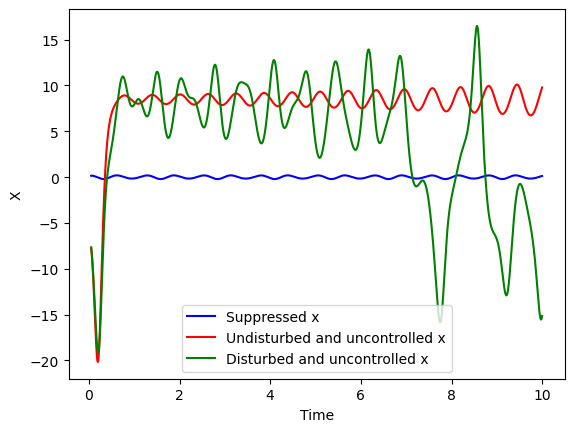

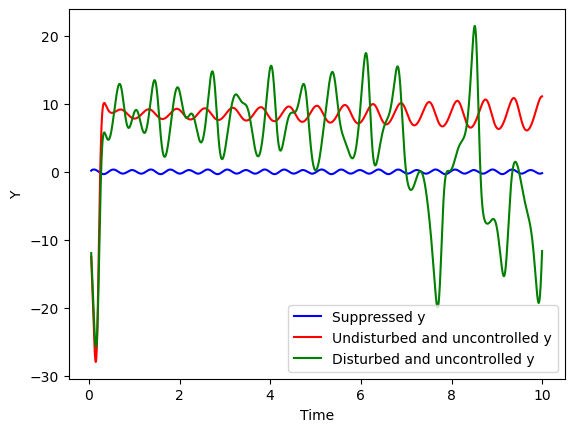

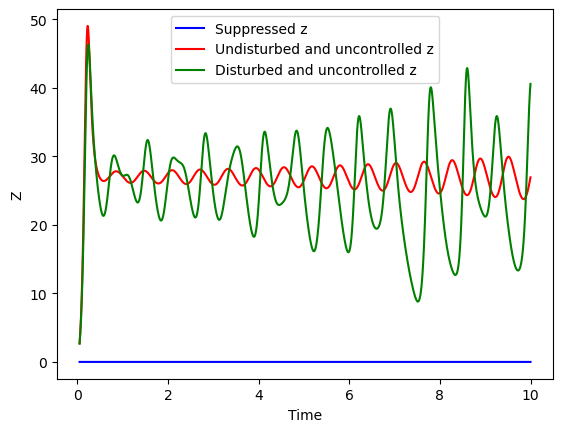

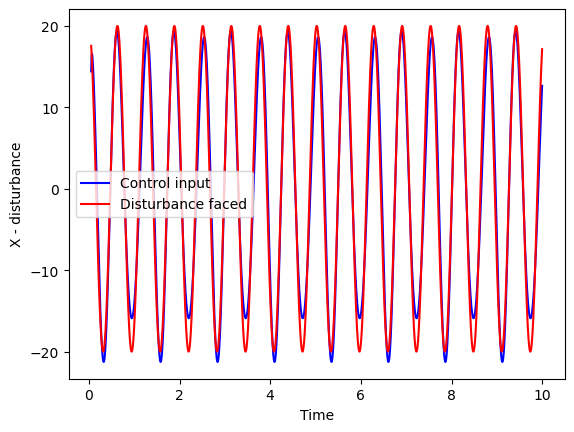

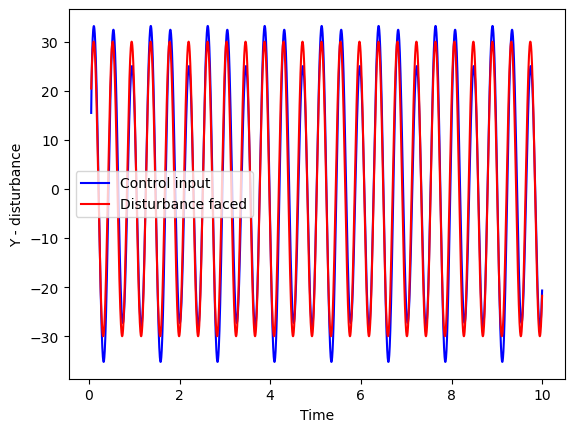

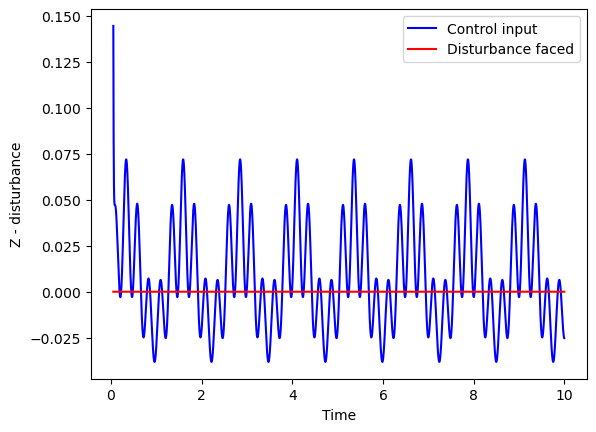

In [10]:
## Lorenz system parameters 
sigma = 10
rho = 28
beta = 8/3

### Testing delayed control with altered rho ###

Ttest = 10
dt = 0.001
ntest = int(Ttest / dt)
testingtimes = np.linspace(0, Ttest, ntest + 1)

gxnocontrol = np.zeros(ntest)
gxcontrol = np.zeros(ntest)
ux = np.zeros(ntest + 1)
vx = np.zeros(ntest + 1)

gynocontrol = np.zeros(ntest)
gycontrol = np.zeros(ntest)
uy = np.zeros(ntest + 1)
vy = np.zeros(ntest + 1)

gznocontrol = np.zeros(ntest)
gzcontrol = np.zeros(ntest)
uz = np.zeros(ntest + 1)
vz = np.zeros(ntest + 1)

## Storing x, y, z time series data when there is disturbance and control is applied
xcontrol = np.zeros(ntest)             
ycontrol = np.zeros(ntest)
zcontrol = np.zeros(ntest)

## Storing x, y, z time series data when there is disturbance and control is not applied
xnocontrol = np.zeros(ntest)
ynocontrol = np.zeros(ntest)
znocontrol = np.zeros(ntest)

## Storing x, y, z time series data if there was no disturbance
xpure = np.zeros(ntest)
ypure = np.zeros(ntest)
zpure = np.zeros(ntest)

## Storing x, y, z time series data when trying to suppress the disturbance
xsupp = np.zeros(ntest)
ysupp = np.zeros(ntest)
zsupp = np.zeros(ntest)


## Suppression gain
k = 100
uxsupp = np.zeros(ntest)
uysupp = np.zeros(ntest)
uzsupp = np.zeros(ntest)

xxcontrol, yycontrol, zzcontrol = -7.45, -3.03, 0.01
xxnocontrol, yynocontrol, zznocontrol = -7.45, -3.03, 0.01
xxpure, yypure, zzpure = -7.45, -3.03, 0.01
xxsupp, yysupp, zzsupp = -7.45, -3.03, 0.01




for t in range(ntest):

    ## No disturbance and system is evolving with old parameters

    xxpurep = sigma * (yypure - xxpure)
    yypurep = xxpure * (rho - zzpure) - yypure
    zzpurep = xxpure * yypure - beta * zzpure

    xxpure += dt * xxpurep
    yypure += dt * yypurep
    zzpure += dt * zzpurep

    xpure[t] = xxpure
    ypure[t] = yypure
    zpure[t] = zzpure    
    
    

    ## Disturbance but no control
    
    
    gxnocontrol[t] = 20 * np.cos(10 * dt * t)
    gynocontrol[t] = 30 * np.sin(15 * dt * t)




    xxnocontrolp = sigma * (yynocontrol - xxnocontrol)
    yynocontrolp = xxnocontrol * (rho - zznocontrol) - yynocontrol + gynocontrol[t]
    zznocontrolp = xxnocontrol * yynocontrol - beta * zznocontrol
    
    xxnocontrol += dt * xxnocontrolp
    yynocontrol += dt * yynocontrolp
    zznocontrol += dt * zznocontrolp

    xnocontrol[t] = xxnocontrol
    ynocontrol[t] = yynocontrol
    znocontrol[t] = zznocontrol



    ## Disturbance with delayed control

    gxcontrol[t] = 20 * np.cos(10 * dt * t)
    gycontrol[t] = 30 * np.sin(15 * dt * t)

    ## Suppressing disturbance

    xxsuppp = sigma * (yysupp - xxsupp) + gxcontrol[t]
    yysuppp = xxsupp * (rho - zzsupp) - yysupp + gycontrol[t]
    zzsuppp = xxsupp * yysupp - beta * zzsupp + gzcontrol[t]

    xxsupp += dt * (xxsuppp + k * (-xxsupp))
    yysupp += dt * (yysuppp + k * (-yysupp))
    zzsupp += dt * (zzsuppp + k * (-zzsupp))

    xsupp[t] = xxsupp
    ysupp[t] = yysupp
    zsupp[t] = zzsupp

    uxsupp[t] = k * xxsupp
    uysupp[t] = k * yysupp
    uzsupp[t] = k * zzsupp









plottimerange = np.arange(50, ntest)


## Plotting x, y and z time series when trying to suppress the disturbance
plt.figure()
plt.plot(testingtimes[plottimerange], xsupp[plottimerange],  'b', label = 'Suppressed x')
plt.plot(testingtimes[plottimerange], xpure[plottimerange],  'r', label = 'Undisturbed and uncontrolled x')
plt.plot(testingtimes[plottimerange], xnocontrol[plottimerange],  'g', label = 'Disturbed and uncontrolled x')
plt.legend()
plt.xlabel('Time')
plt.ylabel('X')
plt.show()

plt.figure()
plt.plot(testingtimes[plottimerange], ysupp[plottimerange],  'b', label = 'Suppressed y')
plt.plot(testingtimes[plottimerange], ypure[plottimerange],  'r', label = 'Undisturbed and uncontrolled y')
plt.plot(testingtimes[plottimerange], ynocontrol[plottimerange],  'g', label = 'Disturbed and uncontrolled y')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

plt.figure()
plt.plot(testingtimes[plottimerange], zsupp[plottimerange],  'b', label = 'Suppressed z')
plt.plot(testingtimes[plottimerange], zpure[plottimerange],  'r', label = 'Undisturbed and uncontrolled z')
plt.plot(testingtimes[plottimerange], znocontrol[plottimerange],  'g', label = 'Disturbed and uncontrolled z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Z')
plt.show()

plt.figure()
plt.plot(testingtimes[plottimerange], uxsupp[plottimerange],  'b', label = 'Control input')
plt.plot(testingtimes[plottimerange], gxcontrol[plottimerange],  'r', label = 'Disturbance faced')
plt.legend()
plt.xlabel('Time')
plt.ylabel('X - disturbance')
plt.show()

plt.figure()
plt.plot(testingtimes[plottimerange], uysupp[plottimerange],  'b', label = 'Control input')
plt.plot(testingtimes[plottimerange], gycontrol[plottimerange],  'r', label = 'Disturbance faced')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Y - disturbance')
plt.show()

plt.figure()
plt.plot(testingtimes[plottimerange], uzsupp[plottimerange],  'b', label = 'Control input')
plt.plot(testingtimes[plottimerange], gzcontrol[plottimerange],  'r', label = 'Disturbance faced')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Z - disturbance')
plt.show()




We have a lorenz system running with a disturbance. Our aim is to suppress this system so that the states x, y and z are close to 0. 
This detects the disturbance and suppresses it without the use of a reservoir. Mainly because the system here is such that f(0) = 0. So the control input is exactly the same as the disturbance. If f(0) is not 0, then the control input is not the same as the disturbance, since the derivative term f(0) also contributes. Then f(0) + g(t) = kx